# Versuch 222 - Heißluftmotor - Python Skript
##### Jan A. Kesting - 10.11.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Betrieb als Kältemaschine

In [2]:
# Messdaten:
f_km = 318 / 60 #Drehzahl in 1/s
f_km_err = 10 / 60

U_H_km = 5.44
U_H_km_err = 0.02

I_H_km = 5.4
I_H_km_err = 0.05

V_punkt_km = 237 / (60 * 10**(6)) # l/s
V_punkt_km_err = 2 / (60 * 10**(6))

U_M_km = 24.1
U_M_km_err = 0.1

I_M_km = 3.3
I_M_km_err = 0.2

f_M_km = 300/60
f_M_km_err = 10 /60

T_1_km = 22.5 + 273.15
T_1_km_err = 1

T_2_km = 18.0 + 273.15
T_2_km_err = 0.1

Delta_T_km = T_1_km - T_2_km
Delta_T_km_err = np.sqrt(T_1_km_err**2 + T_2_km_err**2)

c_W = 4190 # J/kgK
rho_W = 997 # kg/m^3

In [3]:
# Man berechne Q_1
Q_1_km = (c_W * rho_W * V_punkt_km * Delta_T_km)/(f_km)

Q_1_km_err = np.sqrt((V_punkt_km_err/V_punkt_km)**2 + (Delta_T_km_err/Delta_T_km)**2 + (f_km_err/f_km)**2) * Q_1_km

print("Q_1:", Q_1_km, "+-", Q_1_km_err, "[J]")

Q_1: 14.010154386792452 +- 3.1619724058738536 [J]


In [4]:
# Man berechne Q_2 und die Kälteleistung
Q_2_km = (U_H_km * I_H_km)/f_km
P_H_km = (U_H_km * I_H_km)

Q_2_km_err = np.sqrt((U_H_km_err/U_H_km)**2 + (I_H_km_err/I_H_km)**2 + (f_km_err/f_km)**2) * Q_2_km
P_H_km_err = np.sqrt((U_H_km_err/U_H_km)**2 + (I_H_km_err/I_H_km)**2) * P_H_km

print("Q_2:", Q_2_km, "+-", Q_2_km_err, "[J]")
print("Kälteleistung:", P_H_km, "+-", P_H_km_err, "[J/s]")

Q_2: 5.542641509433963 +- 0.182834534302918 [J]
Kälteleistung: 29.376000000000005 +- 0.2926567955814456 [J/s]


In [5]:
# Berechne W_M
W_M_km = (U_M_km * I_M_km)/f_M_km

W_M_km_err = np.sqrt((U_M_km_err/U_M_km)**2 + (I_M_km_err/I_M_km)**2 + (f_M_km_err/f_M_km)**2) * W_M_km

print("W_M:", W_M_km, "+-", W_M_km_err, "[J]")

W_M: 15.906 +- 1.1021633454257134 [J]


In [6]:
# Es soll sein: Q_1 = Q_2 + W_M. Man prüfe:
E_km_diff = Q_2_km + W_M_km - Q_1_km
E_km_diff_err = np.sqrt(Q_2_km_err**2 + W_M_km_err**2 + Q_1_km_err**2)

print("Differenz der Energiebilanz:", E_km_diff, "+-", E_km_diff_err, "[J]" )

# Abweichung:
sigma_E_km_diff = E_km_diff / E_km_diff_err

print("Sigma-Abweichung:", sigma_E_km_diff)

Differenz der Energiebilanz: 7.43848712264151 +- 3.3535446921789265 [J]
Sigma-Abweichung: 2.2180969110056616


In [7]:
# Man berechne noch den Wirkungsgrad
eta_km = Q_2_km / W_M_km

eta_km_err = np.sqrt((Q_2_km_err/Q_2_km)**2 + (W_M_km_err/W_M_km)**2) * eta_km 

print("Wirkungsgrad:", eta_km, "+-", eta_km_err)

Wirkungsgrad: 0.34846231041330084 +- 0.0267422025323036


## Betrieb als Kältemaschine und Wärmepumpe
Berechnung der Kälteleistung: $P_{km} = \frac{\lambda_{H2O}m_W}{t_{gef}} $

In [8]:
# Man bestimmt aus dem Temperaturverlauf die Gefrierzeit und daraus die Kälteleistung

t_gef = 140 #s
t_gef_err = 20

lambda_h2o = 335 * 1000 #J/kg
V_W = 1*10**(-6) #m^3

m_W = rho_W * V_W

P_km = lambda_h2o * m_W / t_gef
P_km_err = (t_gef_err /t_gef) * P_km

print("Kälteleistung:", P_km, "+-", P_km_err, "[J/s]")

sigma = np.abs(P_km-P_H_km)/(np.sqrt(P_km_err**2 + P_H_km_err**2))
print("Vergleich der Kälteleistungen:", sigma)

Kälteleistung: 2.3856785714285715 +- 0.3408112244897959 [J/s]
Vergleich der Kälteleistungen: 60.08238485355965


## Betrieb als Wärmekraftmaschine


In [9]:
# Unsere Messwerte
U_H_wk = 11.91 #V
U_H_wk_err = 0.02

I_H_wk = 13.8 #A
I_H_wk_err = 0.05

f_wk_array = np.array([296 , 290 , 292]) / 60 # 1/s
f_wk = np.mean(f_wk_array)
f_wk_err_reading = 10/60
f_wk_err = np.sqrt((np.std(f_wk_array) / np.sqrt(3))**2 + f_wk_err_reading**2)

print("Gemittelte Drehzahl:", f_wk, "+-", f_wk_err, "[1/s]")

T_ab = 24.0 + 273.1
T_ab_err = 0.1

T_zu = 18.1 + 273.1
T_zu_err = 0.1 

delta_T_wk = T_ab - T_zu 
delta_T_wk_err = np.sqrt((T_ab_err)**2 + (T_zu_err)**2)

W_pV_wk_array = np.array([25730*10**(-4) , 27930*10**(-4) , 26610*10**(-4)]) #Pa m^3
W_pV_wk = np.mean(W_pV_wk_array)
W_pV_wk_err = np.std(W_pV_wk_array) / np.sqrt(3)

print("Gemittelte Arbeit pV:", W_pV_wk, "+-", W_pV_wk_err, "[Pa/m^3]")

V_punkt_wk = 236 / (60 * 10**(6))
V_punkt_wk_err = 2 / (60 * 10**(6))

Gemittelte Drehzahl: 4.877777777777777 +- 0.16838619143213787 [1/s]
Gemittelte Arbeit pV: 2.6756666666666664 +- 0.05219904923215313 [Pa/m^3]


In [10]:
# Wir berechnen: P_el, Q_el, P_ab, Q_ab, P_pV, eta_th

P_el = U_H_wk * I_H_wk
P_el_err = np.sqrt((U_H_wk * I_H_wk_err)**2 + (U_H_wk_err * I_H_wk)**2)
print("P_el:", P_el, "+-", P_el_err, "[J/s]")

Q_el = P_el / f_wk
Q_el_err = np.sqrt((f_wk_err / f_wk)**2 + (P_el_err / P_el)**2)
print("Q_el:", Q_el, "+-", Q_el_err, "[J]")

P_ab = c_W * rho_W * delta_T_wk * V_punkt_wk
P_ab_err = P_ab * np.sqrt((delta_T_wk_err/delta_T_wk)**2 + (V_punkt_wk_err/V_punkt_wk)**2)
print("P_ab:", P_ab, "+-", P_ab_err, "[J/s]")

Q_ab = P_ab / f_wk
Q_ab_err = Q_ab * np.sqrt((P_ab_err/P_ab)**2 + (f_wk_err/f_wk)**2)
print("Q_ab:", Q_ab, "+-", Q_ab_err, "[J]")

P_pV = W_pV_wk * f_wk
P_pV_err = np.sqrt((W_pV_wk_err * f_wk)**2 + (W_pV_wk * f_wk_err)**2)
print("P_pV:", P_pV, "+-", P_pV_err, "[J/s]")

eta_th = W_pV_wk / Q_el
eta_th_err = np.sqrt((W_pV_wk_err / W_pV_wk)**2 + (Q_el_err/Q_el)**2) * eta_th
print("eta_th:", eta_th, "+-", eta_th_err)

P_el: 164.358 +- 0.6563507065586203 [J/s]
Q_el: 33.695261958997726 +- 0.034751300198073334 [J]
P_ab: 96.94422553333297 +- 2.4646836999999997 [J/s]
Q_ab: 19.874670382687853 +- 0.8520814843432313 [J]
P_pV: 13.051307407407405 +- 0.5175133502758776 [J/s]
eta_th: 0.07940780130816513 +- 0.0015513142501031247


In [11]:
# Energiebilanz Q_el = Q_v + W_pV + Q_ab + Q_R, Q_V = Q_v + Q_R
Q_V = Q_el - W_pV_wk - Q_ab
Q_V_err = np.sqrt(Q_el_err**2 + W_pV_wk_err**2 + Q_ab_err**2)
print("Energieverluste:", Q_V, "+-", Q_V_err, "[J]")

Energieverluste: 11.144924909643208 +- 0.8543858903134822 [J]


In [12]:
# Drehmomentmessung und Bestimmung von W_D, W_pV_dreh, eta_th_dreh und eta_eff

# Berechnung der Mittelwerte
#0.8N
f_08_array = np.array([202 , 196 , 199]) / 60 #1/s
f_08 = np.mean(f_08_array)
f_08_err_reading = 10/60
f_08_err = np.sqrt((np.std(f_08_array)/np.sqrt(3))**2 + f_08_err_reading**2)
print("Frequenz_08:", f_08, "+-", f_08_err, "[1/s]")

W_pV_08_array = np.array([3.1090 , 3.1430 , 3.1820]) # Pa m^3
W_pV_08 = np.mean(W_pV_08_array)
W_pV_08_err = np.std(W_pV_08_array)/np.sqrt(3)

#0.6N
f_06_array = np.array([227 , 229 , 231]) / 60 #1/s
f_06 = np.mean(f_06_array)
f_06_err_reading = 10/60
f_06_err = np.sqrt((np.std(f_06_array)/np.sqrt(3))**2 + f_06_err_reading**2)
print("Frequenz_06:", f_06, "+-", f_06_err, "[1/s]")

W_pV_06_array = np.array([3.0590 , 3.101 , 3.074]) # Pa m^3
W_pV_06 = np.mean(W_pV_06_array)
W_pV_06_err =np.std(W_pV_06_array)/np.sqrt(3)

#0.4N
f_04_array = np.array([252 , 250 , 258]) / 60 #1/s
f_04 = np.mean(f_04_array)
f_04_err_reading = 10/60
f_04_err = np.sqrt((np.std(f_04_array)/np.sqrt(3))**2 + f_04_err_reading**2)
print("Frequenz_04:", f_04, "+-", f_04_err, "[1/s]")

W_pV_04_array = np.array([2.9770 , 2.9280 , 2.9360]) # Pa m^3
W_pV_04 = np.mean(W_pV_04_array)
W_pV_04_err = np.std(W_pV_04_array)/np.sqrt(3)

#0.2N
f_02_array = np.array([295, 297, 295]) / 60 #1/s
f_02 = np.mean(f_02_array)
f_02_err_reading = 10/60
f_02_err = np.sqrt ((np.std(f_02_array)/np.sqrt(3))**2 + f_02_err_reading**2)
print("Frequenz_02:", f_02, "+-", f_02_err, "[1/s]")

W_pV_02_array = np.array([2.9310 , 2.8770 , 2.8770]) # Pa m^3
W_pV_02 = np.mean(W_pV_02_array)
W_pV_02_err = np.std(W_pV_02_array)/np.sqrt(3)

Frequenz_08: 3.3166666666666664 +- 0.16832508230603463 [1/s]
Frequenz_06: 3.8166666666666664 +- 0.16740576859243736 [1/s]
Frequenz_04: 4.222222222222222 +- 0.16984621463404592 [1/s]
Frequenz_02: 4.927777777777778 +- 0.1669133976184259 [1/s]


In [13]:
# Wir berechnen W_D = 2*pi*l*F
l = 0.2 * 0.5 #m
F = np.array([0.8 , 0.6 , 0.4 , 0.2])#N
F_err = np.ones(4)*0.03

W_D_array = 2*np.pi*l*F
W_D_array_err = 2*np.pi*l*F_err
print("Mechanische Arbeiten: ",W_D_array, "+-", W_D_array_err, "[J]")

# Wir berechnen eta_th_dreh = W_pV_dreh / Q_el
W_pV_dreh = np.array([W_pV_08, W_pV_06 , W_pV_04 , W_pV_02])
W_pV_dreh_err = np.array([W_pV_08_err, W_pV_06_err , W_pV_04_err , W_pV_02_err])

eta_th_dreh = W_pV_dreh / Q_el
eta_th_dreh_err = np.sqrt((W_pV_dreh_err / W_pV_dreh)**2 + (Q_el_err / Q_el)**2) * eta_th_dreh

print("eta_th Drehmomentmessung:", eta_th_dreh, "+-", eta_th_dreh_err)

# Wir berechnen eta_eff = W_D / Q_el

eta_eff = W_D_array / Q_el
eta_eff_err = np.sqrt((W_D_array_err / W_D_array)**2 + ( Q_el_err /Q_el)**2) * eta_eff
print("eta_eff:", eta_eff, "+-", eta_eff_err)

Mechanische Arbeiten:  [0.50265482 0.37699112 0.25132741 0.12566371] +- [0.01884956 0.01884956 0.01884956 0.01884956] [J]
eta_th Drehmomentmessung: [0.09332667 0.09134815 0.08746037 0.08591712] +- [0.00052003 0.00031231 0.00037866 0.00044508]
eta_eff: [0.01491767 0.01118825 0.00745884 0.00372942] +- [0.00055962 0.00055953 0.00055947 0.00055943]


Text(0, 0.5, '$\\eta_{th}$')

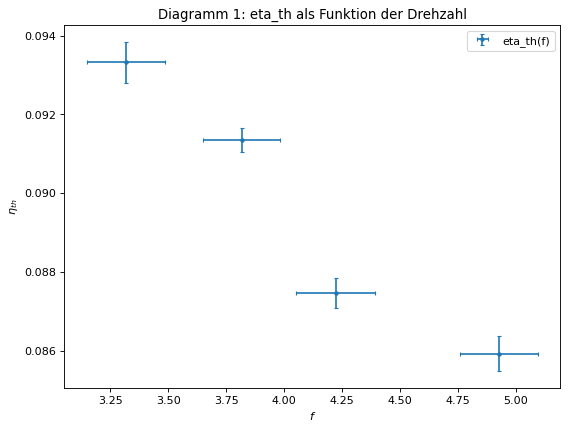

In [14]:
# Wir tragen eta_th und eta_eff als Funktion der Frequenz auf:
f_array = np.array([f_08 , f_06 , f_04 , f_02])
f_array_err = np.array([f_08_err , f_06_err , f_04_err , f_02_err])

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_array, eta_th_dreh, linestyle="None", marker = ".", yerr = eta_th_dreh_err, xerr = f_array_err , capsize = 2, label="eta_th(f)")
plt.title("Diagramm 1: eta_th als Funktion der Drehzahl")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\eta_{th}$")

Text(0, 0.5, '$\\eta_{eff}$')

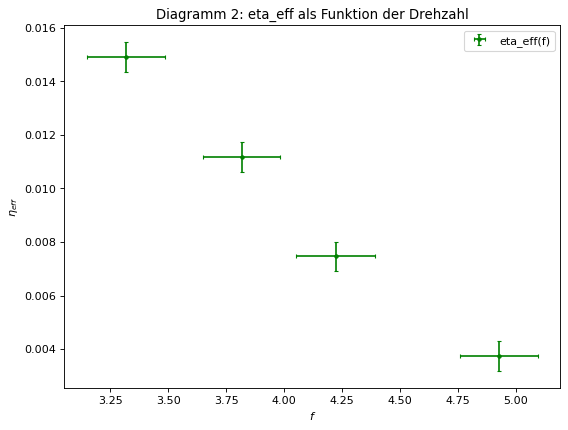

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_array, eta_eff, linestyle="None", marker = ".", yerr = eta_eff_err, xerr = f_array_err , capsize = 2, label="eta_eff(f)", color = "green")
plt.title("Diagramm 2: eta_eff als Funktion der Drehzahl")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\eta_{eff}$")